## CMPINF 2100 Week 10 | Making Predictions with Linear Models

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

### Read Data

In [2]:
df = pd.read_csv('week_10_linear_data.csv')

In [3]:
df

,x,trend,y,true_intercept,true_slope,true_sigma
0,-3.00,4.750,6.030315,0.25,-1.5,1.25
1,-2.25,3.625,1.457911,0.25,-1.5,1.25
2,-1.50,2.500,2.388383,0.25,-1.5,1.25
3,-0.75,1.375,0.007815,0.25,-1.5,1.25
4,0.00,0.250,0.651244,0.25,-1.5,1.25
5,0.75,-0.875,-2.254007,0.25,-1.5,1.25
6,1.50,-2.000,-2.969992,0.25,-1.5,1.25
7,2.25,-3.125,-3.537097,0.25,-1.5,1.25
8,3.00,-4.250,-6.063282,0.25,-1.5,1.25


### Fit the Linear Model

Let's fit the linear model with the linear relationship between the SINGLE input `x` and the MEAN OUTPUT of `y`.

In [4]:
lm_fit = smf.ols(formula='y~x' , data=df).fit()

In [5]:
lm_fit.params

Intercept   -0.476523
x           -1.696400
dtype: float64

In [6]:
lm_fit.bse

Intercept    0.370031
x            0.191083
dtype: float64

In [7]:
lm_fit.pvalues

Intercept    0.238754
x            0.000047
dtype: float64

In [9]:
lm_fit.conf_int().\
rename(columns={0: 'ci_lwr', 1:'ci_upr'})

,ci_lwr,ci_upr
Intercept,-1.351507,0.39846
x,-2.148239,-1.24456


### Making Predictions

Unfortunately, predictions are the LEAST used tools for interpreting model behavior!

Predictions can be made on data that DO NOT INCLUDE observed outputs!

WE can creaet our own data sets and visualize the predictive trends, predictive uncertainty, the predictive behavior for ANY input vallue!

Let's create a data set that has MORE input locations than the training set.

In [13]:
df_viz = pd.DataFrame({'x': np.linspace( df.x.min()-0.1, df.x.max()+0.1, num=101)})

In [14]:
df_viz

,x
0,-3.100
1,-3.038
2,-2.976
3,-2.914
4,-2.852
...,...
96,2.852
97,2.914
98,2.976
99,3.038


In [15]:
df

,x,trend,y,true_intercept,true_slope,true_sigma
0,-3.00,4.750,6.030315,0.25,-1.5,1.25
1,-2.25,3.625,1.457911,0.25,-1.5,1.25
2,-1.50,2.500,2.388383,0.25,-1.5,1.25
3,-0.75,1.375,0.007815,0.25,-1.5,1.25
4,0.00,0.250,0.651244,0.25,-1.5,1.25
5,0.75,-0.875,-2.254007,0.25,-1.5,1.25
6,1.50,-2.000,-2.969992,0.25,-1.5,1.25
7,2.25,-3.125,-3.537097,0.25,-1.5,1.25
8,3.00,-4.250,-6.063282,0.25,-1.5,1.25


We can ask **WHAT IF** questions? What if the INPUT is at a NEW value that we DID NOT see previously?

What will the OUTPUT be?

The statsmodels fitted object includes the `.predict()` method. This method will let you PREDICT a new data set given the FITTED MODEL. 

Make the prediction and assign the `lm_pred` object.

In [16]:
lm_pred = lm_fit.predict( df_viz )

In [17]:
type ( lm_pred )

pandas.core.series.Series

In [18]:
lm_pred

0      4.782316
1      4.677139
2      4.571962
3      4.466785
4      4.361608
         ...   
96    -5.314655
97    -5.419832
98    -5.525008
99    -5.630185
100   -5.735362
Length: 101, dtype: float64

In [19]:
lm_pred.size

101

Let's make a copy of the visualization DataFrame and add the prediction to this copy.

In [20]:
df_viz_copy = df_viz.copy()

In [21]:
df_viz_copy['pred_trend'] = lm_pred

In [22]:
df_viz_copy

,x,pred_trend
0,-3.100,4.782316
1,-3.038,4.677139
2,-2.976,4.571962
3,-2.914,4.466785
4,-2.852,4.361608
...,...,...
96,2.852,-5.314655
97,2.914,-5.419832
98,2.976,-5.525008
99,3.038,-5.630185


We can visualize the predicted TREND with respect to the INPUT.

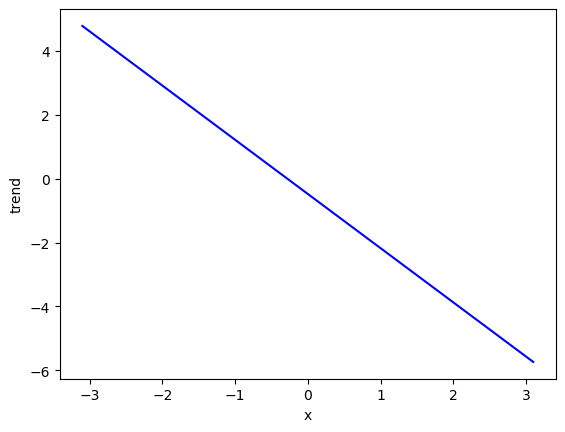

In [23]:
fig, ax = plt.subplots()

ax.plot( df_viz_copy.x, df_viz_copy.pred_trend, color='b' )

ax.set_xlabel('x')
ax.set_ylabel('trend')

plt.show()

Include the TRAINING set as a scatter plot.

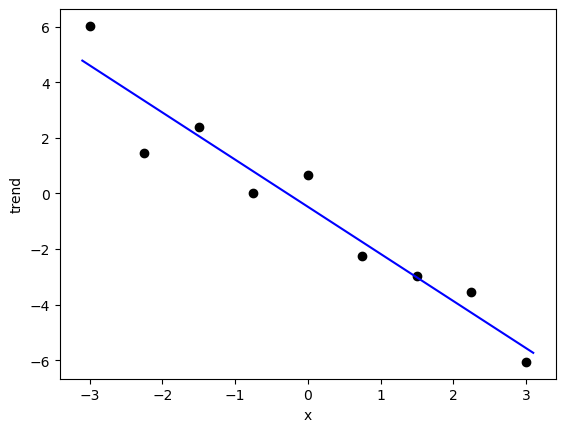

In [24]:
fig, ax = plt.subplots()

ax.plot( df_viz_copy.x, df_viz_copy.pred_trend, color='b' )

ax.scatter( df.x, df.y, color='k' )

ax.set_xlabel('x')
ax.set_ylabel('trend')

plt.show()

Because this is a TOY PROBLEM and we generated the data... we KNOW the REAL answer or the TRUE TREND.

In [25]:
df

,x,trend,y,true_intercept,true_slope,true_sigma
0,-3.00,4.750,6.030315,0.25,-1.5,1.25
1,-2.25,3.625,1.457911,0.25,-1.5,1.25
2,-1.50,2.500,2.388383,0.25,-1.5,1.25
3,-0.75,1.375,0.007815,0.25,-1.5,1.25
4,0.00,0.250,0.651244,0.25,-1.5,1.25
5,0.75,-0.875,-2.254007,0.25,-1.5,1.25
6,1.50,-2.000,-2.969992,0.25,-1.5,1.25
7,2.25,-3.125,-3.537097,0.25,-1.5,1.25
8,3.00,-4.250,-6.063282,0.25,-1.5,1.25


In [26]:
my_intercept = np.unique( df.true_intercept )

In [27]:
my_slope = np.unique( df.true_slope )

Display the TRUE TREND the TRUE MEAN relationship to the INPUT with the PREDICTED TREND.

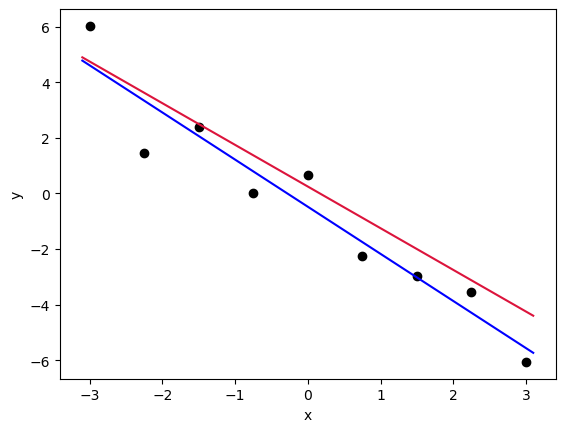

In [31]:
fig, ax = plt.subplots()

ax.plot( df_viz_copy.x, df_viz_copy.pred_trend, color='b', label='model' )

ax.plot( df_viz_copy.x, my_intercept + my_slope * df_viz_copy.x, color='crimson', label='truth')

ax.scatter( df.x, df.y, color='k' )

ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

We will NEVER know the TRUE relationship... we MUST ALWAYS include the CONFIDENCE INTERVAL on the TREND!

We must always represent the UNCERTAINTY on the TREND given the fitted data!

We will use the statsmodels to pull out the predictive uncertainty!

statsmodels provides a 2 step process for extractingthe predictive uncertainty on the predictions.

Step 1: call the `.get_prediction()` method on the fitted object. 

In [32]:
predictions = lm_fit.get_prediction(df_viz)

In [33]:
type(predictions)

statsmodels.regression._prediction.PredictionResults

Step 2: call the `.summary_frame()` method on the Prediction Object.

In [34]:
lm_pred_summary = predictions.summary_frame()

In [35]:
lm_pred_summary

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,4.782316,0.698434,3.130782,6.433850,1.681036,7.883595
1,4.677139,0.688415,3.049296,6.304981,1.588411,7.765866
2,4.571962,0.678455,2.967672,6.176252,1.495582,7.648342
3,4.466785,0.668556,2.885902,6.047668,1.402546,7.531024
4,4.361608,0.658721,2.803980,5.919237,1.309302,7.413915
...,...,...,...,...,...,...
96,-5.314655,0.658721,-6.872283,-3.757026,-8.366961,-2.262349
97,-5.419832,0.668556,-7.000715,-3.838948,-8.484070,-2.355593
98,-5.525008,0.678455,-7.129298,-3.920718,-8.601388,-2.448628
99,-5.630185,0.688415,-7.258028,-4.002343,-8.718913,-2.541458


Visualize the 95% confidence interval on the MEAN OUTPUT using RIBBONS!

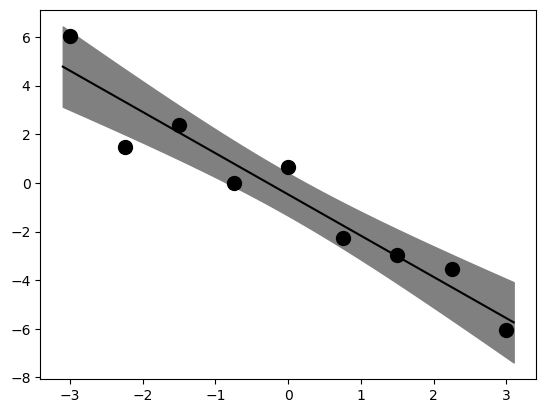

In [38]:
fig, ax = plt.subplots()

# confidence interval - the uncertainty on the mean output
ax.fill_between( df_viz_copy.x,
                 lm_pred_summary.mean_ci_lower, lm_pred_summary.mean_ci_upper,
                 facecolor='grey', edgecolor='grey' )
# output mean - the predictive trend - the best fit line
ax.plot( df_viz_copy.x, lm_pred_summary['mean'], color='k', linewidth=1.5)
# include the training data
ax.scatter( df.x, df.y, color='k', s=100 )
# set the labels

# show the plot
plt.show()

Include the True TREND as context

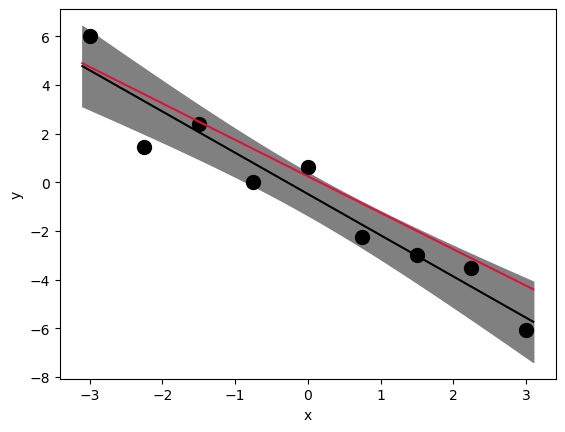

In [40]:
fig, ax = plt.subplots()

#include the true trend
ax.plot( df_viz_copy.x, my_intercept + my_slope * df_viz_copy.x, color='crimson' )

# confidence interval - the uncertainty on the mean output
ax.fill_between( df_viz_copy.x,
                 lm_pred_summary.mean_ci_lower, lm_pred_summary.mean_ci_upper,
                 facecolor='grey', edgecolor='grey' )
# output mean - the predictive trend - the best fit line
ax.plot( df_viz_copy.x, lm_pred_summary['mean'], color='k', linewidth=1.5)
# include the training data
ax.scatter( df.x, df.y, color='k', s=100 )
# set the labels
ax.set_xlabel('x')
ax.set_ylabel('y')

# show the plot
plt.show()

But, this is NOT a complete story...

This is just expressing the UNCERTAINTY on the AVERAGE! The uncertainty on the MEAN output!

But we also have the SIGMA parameter!

In [41]:
lm_pred_summary

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,4.782316,0.698434,3.130782,6.433850,1.681036,7.883595
1,4.677139,0.688415,3.049296,6.304981,1.588411,7.765866
2,4.571962,0.678455,2.967672,6.176252,1.495582,7.648342
3,4.466785,0.668556,2.885902,6.047668,1.402546,7.531024
4,4.361608,0.658721,2.803980,5.919237,1.309302,7.413915
...,...,...,...,...,...,...
96,-5.314655,0.658721,-6.872283,-3.757026,-8.366961,-2.262349
97,-5.419832,0.668556,-7.000715,-3.838948,-8.484070,-2.355593
98,-5.525008,0.678455,-7.129298,-3.920718,-8.601388,-2.448628
99,-5.630185,0.688415,-7.258028,-4.002343,-8.718913,-2.541458


We need to include the PREDICTION INTERVAL as A SECOND RIBBON in our visualizations for regression problems!

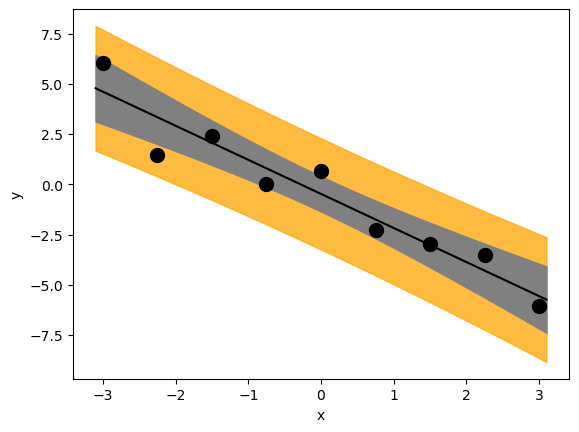

In [42]:
fig, ax = plt.subplots()

# prediction interval - the uncertainty on a single measurement (observation)
ax.fill_between( df_viz_copy.x,
                 lm_pred_summary.obs_ci_lower, lm_pred_summary.obs_ci_upper,
                 facecolor='orange', alpha=0.75, edgecolor='orange' )

# confidence interval - the uncertainty on the mean output
ax.fill_between( df_viz_copy.x,
                 lm_pred_summary.mean_ci_lower, lm_pred_summary.mean_ci_upper,
                 facecolor='grey', edgecolor='grey' )
# output mean - the predictive trend - the best fit line
ax.plot( df_viz_copy.x, lm_pred_summary['mean'], color='k', linewidth=1.5)
# include the training data
ax.scatter( df.x, df.y, color='k', s=100 )
# set the labels
ax.set_xlabel('x')
ax.set_ylabel('y')

# show the plot
plt.show()